# Fake News Detection




## Objective


The objective of this assignment is to develop a Semantic Classification model. You will be using Word2Vec method to extract the semantic relations from the text and develop a basic understanding of how to train supervised models to categorise text based on its meaning, rather than just syntax. You will explore how this technique is used in situations where understanding textual meaning plays a critical role in making accurate and efficient decisions.


## Business Objective

The spread of fake news has become a significant challenge in today’s digital world. With the massive volume of news articles published daily, it’s becoming harder to distinguish between credible and misleading information. This creates a need for systems that can automatically classify news articles as true or fake, helping to reduce misinformation and protect public trust.


In this assignment, you will develop a Semantic Classification model that uses the Word2Vec method to detect recurring patterns and themes in news articles. Using supervised learning models, the goal is to build a system that classifies news articles as either fake or true.


<h2> Pipelines that needs to be performed </h2>

You need to perform the following tasks to complete the assignment:

<ol type="1">

  <li> Data Preparation
  <li> Text Preprocessing
  <li> Train Validation Split
  <li> EDA on Training Data
  <li> EDA on Validation Data [Optional]
  <li> Feature Extraction
  <li> Model Training and Evaluation

</ol>

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Dictionary


For this assignment, you will work with two datasets, `True.csv` and `Fake.csv`.
Both datasets contain three columns:
<ul>
  <li> title of the news article
  <li> text of the news article
  <li> date of article publication
</ul>

`True.csv` dataset includes 21,417 true news, while the `Fake.csv` dataset comprises 23,502 fake news.

## Installing required Libraries

In [1]:
!pip install --upgrade numpy==1.26.4
!pip install --upgrade pandas==2.2.2
!pip install --upgrade nltk==3.9.1
!pip install --upgrade spacy==3.7.5
!pip install --upgrade scipy==1.12
!pip install --upgrade pydantic==2.10.5
!pip install wordcloud==1.9.4
!python -m spacy download en_core_web_sm


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


  Using cached click-8.2.1-py3-none-any.whl.metadata (2.5 kB)
     ---------------------------------------- 0.0/41.5 kB ? eta -:--:--
     ---------------------------- --------- 30.7/41.5 kB 660.6 kB/s eta 0:00:01
     -------------------------------------- 41.5/41.5 kB 666.1 kB/s eta 0:00:00
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   -- ------------------------------------- 0.1/1.5 MB 1.7 MB/s eta 0:00:01
   ---------- ----------------------------- 0.4/1.5 MB 4.0 MB/s eta 0:00:01
   ---------------------- ----------------- 0.9/1.5 MB 6.0 MB/s eta 0:00:01
   ------------------------------------ --- 1.4/1.5 MB 7.3 MB/s eta 0:00:01
   ---------------------------------------- 1.5/1.5 MB 6.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/274.1 kB ? eta -:--:--
   --------------------------------------- 274.1/274.1 kB 17.6 MB/s eta 0:00:00
Using cached click-8.2.1-py3-none-any.whl (102 kB)



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


  Using cached spacy_legacy-3.0.12-py2.py3-none-any.whl.metadata (2.8 kB)
  Using cached spacy_loggers-1.0.5-py3-none-any.whl.metadata (23 kB)
  Using cached wasabi-1.1.3-py3-none-any.whl.metadata (28 kB)
  Using cached catalogue-2.0.10-py3-none-any.whl.metadata (14 kB)
  Using cached weasel-0.4.1-py3-none-any.whl.metadata (4.6 kB)
  Using cached typer-0.16.0-py3-none-any.whl.metadata (15 kB)
     ---------------------------------------- 0.0/68.0 kB ? eta -:--:--
     ---------------------------------------- 68.0/68.0 kB 1.9 MB/s eta 0:00:00
  Using cached jinja2-3.1.6-py3-none-any.whl.metadata (2.9 kB)
  Using cached langcodes-3.5.0-py3-none-any.whl.metadata (29 kB)
  Using cached language_data-1.3.0-py3-none-any.whl.metadata (4.3 kB)
  Using cached annotated_types-0.7.0-py3-none-any.whl.metadata (15 kB)
  Using cached typing_inspection-0.4.1-py3-none-any.whl.metadata (2.6 kB)
  Using cached confection-0.1.5-py3-none-any.whl.metadata (19 kB)
  Using cached shellingham-1.5.4-py2.py3-no


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


     ---------------------------------------- 0.0/60.4 kB ? eta -:--:--
     ------------ ------------------------- 20.5/60.4 kB 640.0 kB/s eta 0:00:01
     -------------------------------------- 60.4/60.4 kB 643.6 kB/s eta 0:00:00
   ---------------------------------------- 0.0/46.2 MB ? eta -:--:--
   ---------------------------------------- 0.1/46.2 MB 4.2 MB/s eta 0:00:12
   ---------------------------------------- 0.4/46.2 MB 4.4 MB/s eta 0:00:11
    --------------------------------------- 0.7/46.2 MB 5.8 MB/s eta 0:00:08
    --------------------------------------- 1.0/46.2 MB 5.8 MB/s eta 0:00:08
   - -------------------------------------- 1.4/46.2 MB 6.1 MB/s eta 0:00:08
   - -------------------------------------- 1.8/46.2 MB 6.5 MB/s eta 0:00:07
   - -------------------------------------- 2.1/46.2 MB 6.6 MB/s eta 0:00:07
   - -------------------------------------- 2.1/46.2 MB 6.6 MB/s eta 0:00:07
   - -------------------------------------- 2.1/46.2 MB 6.6 MB/s eta 0:00:07
   - 


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


   ---------------------------------------- 0.0/431.4 kB ? eta -:--:--
   -------- ------------------------------- 92.2/431.4 kB 1.8 MB/s eta 0:00:01
   ------------------------- -------------- 276.5/431.4 kB 2.9 MB/s eta 0:00:01
   ---------------------------------------- 431.4/431.4 kB 3.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.0 MB ? eta -:--:--
   ---------- ----------------------------- 0.5/2.0 MB 10.7 MB/s eta 0:00:01
   -------------------- ------------------- 1.0/2.0 MB 12.8 MB/s eta 0:00:01
   --------------------------------- ------ 1.6/2.0 MB 11.5 MB/s eta 0:00:01
   ---------------------------------------- 2.0/2.0 MB 11.5 MB/s eta 0:00:00
  Attempting uninstall: pydantic-core
    Found existing installation: pydantic_core 2.33.2
    Uninstalling pydantic_core-2.33.2:
      Successfully uninstalled pydantic_core-2.33.2
  Attempting uninstall: pydantic
    Found existing installation: pydantic 2.11.7
    Uninstalling pydantic-2.11.7:
      Successf


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


   ---------------------------------------- 0.0/299.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/299.9 kB ? eta -:--:--
   ------ --------------------------------- 51.2/299.9 kB 1.3 MB/s eta 0:00:01
   ------------------------ --------------- 184.3/299.9 kB 2.2 MB/s eta 0:00:01
   ---------------------------------------- 299.9/299.9 kB 2.3 MB/s eta 0:00:00



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     --------------------------------------- 0.0/12.8 MB 435.7 kB/s eta 0:00:30
     --------------------------------------- 0.1/12.8 MB 544.7 kB/s eta 0:00:24
     --------------------------------------- 0.1/12.8 MB 656.4 kB/s eta 0:00:20
     --------------------------------------- 0.2/12.8 MB 756.6 kB/s eta 0:00:17
      --------------------------------------- 0.3/12.8 MB 1.1 MB/s eta 0:00:12
     - -------------------------------------- 0.3/12.8 MB 1.1 MB/s eta 0:00:12
     - -------------------------------------- 0.5/12.8 MB 1.5 MB/s eta 0:00:09
     -- ------------------------------------- 0.7/12.8 MB 1.8 MB/s eta 0:00:07
     --- ------------------------------------ 1.0/12.8 MB 2.2 MB/s eta 0:00:06
     ---- ----------------------------------- 1.3/12.8 MB 2.7 MB/s eta 0:00:05
     ---- ----------------------------------- 1.6/12.8 MB 3.0 


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
pip install plotly

   ---------------------------------------- 0.0/16.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/16.3 MB 991.0 kB/s eta 0:00:17
    --------------------------------------- 0.2/16.3 MB 2.8 MB/s eta 0:00:06
   - -------------------------------------- 0.5/16.3 MB 3.7 MB/s eta 0:00:05
   -- ------------------------------------- 0.9/16.3 MB 5.1 MB/s eta 0:00:04
   --- ------------------------------------ 1.2/16.3 MB 5.6 MB/s eta 0:00:03
   ---- ----------------------------------- 1.8/16.3 MB 6.4 MB/s eta 0:00:03
   ----- ---------------------------------- 2.3/16.3 MB 7.0 MB/s eta 0:00:03
   ------- -------------------------------- 3.0/16.3 MB 7.9 MB/s eta 0:00:02
   -------- ------------------------------- 3.5/16.3 MB 8.3 MB/s eta 0:00:02
   --------- ------------------------------ 4.1/16.3 MB 8.6 MB/s eta 0:00:02
   ----------- ---------------------------- 4.7/16.3 MB 9.0 MB/s eta 0:00:02
   ------------ --------------------------- 5.2/16.3 MB 9.2 MB/s eta 0:00:02
   -


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


## Importing the necessary libraries

In [5]:
# Import essential libraries for data manipulation and analysis
import numpy as np  # For numerical operations and arrays
import pandas as pd  # For working with dataframes and structured data
import re  # For regular expression operations (text processing)
import nltk  # Natural Language Toolkit for text processing
import spacy  # For advanced NLP tasks
import string  # For handling string-related operations

# Optional: Uncomment the line below to enable GPU support for spaCy (if you have a compatible GPU)
#spacy.require_gpu()

# Load the spaCy small English language model
nlp = spacy.load("en_core_web_sm")

# For data visualization
import seaborn as sns  # Data visualization library for statistical graphics
import matplotlib.pyplot as plt  # Matplotlib for creating static plots
# Configure Matplotlib to display plots inline in Jupyter Notebook
%matplotlib inline

# Suppress unnecessary warnings to keep output clean
import warnings
warnings.filterwarnings('ignore')

# For interactive plots
from plotly.offline import plot  # Enables offline plotting with Plotly
import plotly.graph_objects as go  # For creating customizable Plotly plots
import plotly.express as px  # A high-level interface for Plotly

# For preprocessing and feature extraction in machine learning
from sklearn.feature_extraction.text import (  # Methods for text vectorization
    CountVectorizer,  # Converts text into a bag-of-words model
)

# Import accuracy, precision, recall, f_score from sklearn to predict train accuracy
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Pretty printing for better readability of output
from pprint import pprint

# For progress tracking in loops (useful for larger datasets)
from tqdm import tqdm, tqdm_notebook  # Progress bar for loops
tqdm.pandas()  # Enables progress bars for pandas operations


In [ ]:
## Change the display properties of pandas to max
# pd.set_option('display.max_colwidth', None)
# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

## Load the data

Load the True.csv and Fake.csv files as DataFrames

In [14]:
# Import the first file - True.csv
true = pd.read_csv('True.csv')
# Import the second file - Fake.csv
fake = pd.read_csv('Fake.csv')

## **1.** Data Preparation  <font color = red>[10 marks]</font>





### **1.0** Data Understanding

In [15]:
# Inspect the DataFrame with True News to understand the given data
true.head()

title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text                date  
0  WASHINGTON (Reuters) - The head of a conservat...  December 31, 2017   
1  WASHINGTON (Reuters) - Transgender people will...  December 29, 2017   
2  WASHINGTON (Reuters) - The special counsel inv...  December 31, 2017   
3  WASHINGTON (Reuters) - Trump campaign adviser ...  December 30, 2017   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  December 29, 2017

In [16]:
# Inspect the DataFrame with Fake News to understand the given data
fake.head()

title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text               date  
0  Donald Trump just couldn t wish all Americans ...  December 31, 2017  
1  House Intelligence Committee Chairman Devin Nu...  December 31, 2017  
2  On Friday, it was revealed that former Milwauk...  December 30, 2017  
3  On Christmas day, Donald Trump announced that ...  December 29, 2017  
4  Pope Francis used his annual Christmas Day mes...  December 25, 2017

In [17]:
# Print the column details for True News DataFrame
true.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   21417 non-null  object
 1   text    21417 non-null  object
 2   date    21417 non-null  object
dtypes: object(3)
memory usage: 502.1+ KB


In [18]:
# Print the column details for Fake News Dataframe
fake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23523 entries, 0 to 23522
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   23502 non-null  object
 1   text    23502 non-null  object
 2   date    23481 non-null  object
dtypes: object(3)
memory usage: 551.4+ KB


In [19]:
# Print the column names of both DataFrames
true.columns, fake.columns

(Index(['title', 'text', 'date'], dtype='object'),
 Index(['title', 'text', 'date'], dtype='object'))

### **1.1** Add new column  <font color = red>[3 marks]</font> <br>

Add new column `news_label` to both the DataFrames and assign labels

In [20]:
# Add a new column 'news_label' to the true news DataFrame and assign the label "1" to indicate that these news are true
true['news_label'] = 1
# Add a new column 'news_label' to the fake news DataFrame and assign the label "0" to indicate that these news are fake
fake['news_label'] = 0

### **1.2** Merge DataFrames  <font color = red>[2 marks]</font> <br>

Create a new Dataframe by merging True and Fake DataFrames

In [21]:
# Combine the true and fake news DataFrames into a single DataFrame
df = pd.concat([true, fake], axis=0)

In [22]:
# Display the first 5 rows of the combined DataFrame to verify the result
df.head()

title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text                date  \
0  WASHINGTON (Reuters) - The head of a conservat...  December 31, 2017    
1  WASHINGTON (Reuters) - Transgender people will...  December 29, 2017    
2  WASHINGTON (Reuters) - The special counsel inv...  December 31, 2017    
3  WASHINGTON (Reuters) - Trump campaign adviser ...  December 30, 2017    
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  December 29, 2017    

   news_label  
0           1  
1           1  
2           1  
3           1  
4           1

### **1.3** Handle the null values  <font color = red>[2 marks]</font> <br>

Check for null values and handle it by imputation or dropping the null values

In [23]:
# Check Presence of Null Values
df.isnull().sum()

title         21
text          21
date          42
news_label     0
dtype: int64

In [24]:
# Handle Rows with Null Values
df.dropna(subset=['title', 'text'], inplace=True)

### **1.4** Merge the relevant columns and drop the rest from the DataFrame  <font color = red>[3 marks]</font> <br>

Combine the relevant columns into a new column `news_text` and then drop irrelevant columns from the DataFrame

In [25]:
# Combine the relevant columns into a new column 'news_text' by joining their values with a space
df['news_text'] = df['title'] + ' ' + df['text']
# Drop the irrelevant columns from the DataFrame as they are no longer needed
df.drop(['title', 'text', 'date'], axis=1, inplace=True)
# Display the first 5 rows of the updated DataFrame to check the result
df.head()

news_label                                          news_text
0           1  As U.S. budget fight looms, Republicans flip t...
1           1  U.S. military to accept transgender recruits o...
2           1  Senior U.S. Republican senator: 'Let Mr. Muell...
3           1  FBI Russia probe helped by Australian diplomat...
4           1  Trump wants Postal Service to charge 'much mor...

## **2.** Text Preprocessing <font color = red>[15 marks]</font> <br>






On all the news text, you need to:
<ol type=1>
  <li> Make the text lowercase
  <li> Remove text in square brackets
  <li> Remove punctuation
  <li> Remove words containing numbers
</ol>


Once you have done these cleaning operations you need to perform POS tagging and lemmatization on the cleaned news text, and remove all words that are not tagged as NN or NNS.

### **2.1** Text Cleaning  <font color = red>[5 marks]</font> <br>



#### 2.1.0 Create a new DataFrame to store the processed data



In [26]:
# Create a DataFrame('df_clean') that will have only the cleaned news text and the lemmatized news text with POS tags removed
# Add 'news_label' column to the new dataframe for topic identification
df_clean = df[['news_text', 'news_label']].copy()

#### 2.1.1 Write the function to clean the text and remove all the unnecessary elements  <font color = red>[4 marks]</font> <br>



In [27]:
# Write the function here to clean the text and remove all the unnecessary elements
# Convert to lower case
# Remove text in square brackets
# Remove punctuation
# Remove words with numbers
def clean_text(text):
    text = text.lower()
    text = re.sub(r'\[.*?\]', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = re.sub(r'\w*\d\w*', '', text)
    return text

#### 2.1.2  Apply the function to clean the news text and store the cleaned text in a new column within the new DataFrame. <font color = red>[1 mark]</font> <br>


In [28]:
# Apply the function to clean the news text and remove all unnecessary elements
# Store it in a separate column in the new DataFrame
df_clean['clean_text'] = df_clean['news_text'].progress_apply(clean_text)

100%|██████████| 44919/44919 [00:08<00:00, 5200.35it/s]


### **2.2** POS Tagging and Lemmatization  <font color = red>[10 marks]</font> <br>



#### 2.2.1 Write the function for POS tagging and lemmatization, filtering stopwords and keeping only NN and NNS tags <font color = red>[8 marks]</font> <br>



In [33]:
# Write the function for POS tagging and lemmatization, filtering stopwords and keeping only NN and NNS tags
from nltk.corpus import stopwords
from nltk import pos_tag, word_tokenize
from nltk.stem import WordNetLemmatizer
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('wordnet')
nltk.download('stopwords')

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def nltk_lemmatize_nouns(text):
    tokens = word_tokenize(text)
    pos_tags = pos_tag(tokens)
    lemmatized = [
        lemmatizer.lemmatize(token, pos='n')
        for token, tag in pos_tags
        if tag in ('NN', 'NNS') and token.lower() not in stop_words and token.isalpha()
    ]
    return ' '.join(lemmatized)


[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\rajee\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\rajee\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger_eng.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\rajee\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rajee\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#### 2.2.2  Apply the POS tagging and lemmatization function to cleaned text and store it in a new column within the new DataFrame. <font color = red>[2 mark]</font> <br>

**NOTE: Store the cleaned text and the lemmatized text with POS tags removed in separate columns within the new DataFrame.**

**This will be useful for analysing character length differences between cleaned text and lemmatized text with POS tags removed during EDA.**


In [34]:
# Apply POS tagging and lemmatization function to cleaned text
# Store it in a separate column in the new DataFrame
df_clean['lemmatized_text'] = df_clean['clean_text'].progress_apply(nltk_lemmatize_nouns)

100%|██████████| 44919/44919 [05:50<00:00, 128.34it/s]


### Save the Cleaned data as a csv file (Recommended)

In [35]:
## Recommended to perform the below steps to save time while rerunning the code
df_clean.to_csv("clean_df.csv", index=False)
df_clean = pd.read_csv("clean_df.csv")

In [37]:
# Check the first few rows of the DataFrame
df_clean.head()

news_text  news_label  \
0  As U.S. budget fight looms, Republicans flip t...           1   
1  U.S. military to accept transgender recruits o...           1   
2  Senior U.S. Republican senator: 'Let Mr. Muell...           1   
3  FBI Russia probe helped by Australian diplomat...           1   
4  Trump wants Postal Service to charge 'much mor...           1   

                                          clean_text  \
0  as us budget fight looms republicans flip thei...   
1  us military to accept transgender recruits on ...   
2  senior us republican senator let mr mueller do...   
3  fbi russia probe helped by australian diplomat...   
4  trump wants postal service to charge much more...   

                                     lemmatized_text  
0  budget fight republican script washington head...  
1  transgender recruit monday washington reuters ...  
2  senator job washington counsel investigation l...  
3  fbi russia probe diplomat tipoff washington re...  
4  trump service amazon shipment reuters presiden...

In [38]:
# Check the dimensions of the DataFrame
df_clean.shape

(44919, 4)

In [36]:
# Check the number of non-null entries and data types of each column
df_clean.isnull().sum()
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44919 entries, 0 to 44918
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   news_text        44919 non-null  object
 1   news_label       44919 non-null  int64 
 2   clean_text       44919 non-null  object
 3   lemmatized_text  44908 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.4+ MB


## **3.** Train Validation Split <font color = red>[5 marks]</font> <br>

In [39]:
# Import Train Test Split and split the DataFrame into 70% train and 30% validation data
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    df_clean['lemmatized_text'], df_clean['news_label'], test_size=0.3, random_state=42
)

## **4.** Exploratory Data Analysis on Training Data  <font color = red>[40 marks]</font> <br>

Perform EDA on cleaned and preprocessed texts to get familiar with the training data by performing the tasks given below:

<ul>
  <li> Visualise the training data according to the character length of cleaned news text and lemmatized news text with POS tags removed
  <li> Using a word cloud, find the top 40 words by frequency in true and fake news separately
  <li> Find the top unigrams, bigrams and trigrams by frequency in true and fake news separately
</ul>





### **4.1** Visualise character lengths of cleaned news text and lemmatized news text with POS tags removed  <font color = red>[10 marks]</font> <br>



##### 4.1.1  Add new columns to calculate the character lengths of the processed data columns  <font color = red>[3 marks]</font> <br>



In [41]:
# Add a new column to calculate the character length of cleaned news text
df_clean['clean_length'] = df_clean['clean_text'].str.len()
# Add a new column to calculate the character length of lemmatized news text with POS tags removed
df_clean['lemma_length'] = df_clean['lemmatized_text'].str.len()

##### 4.1.2  Create Histogram to visualise character lengths  <font color = red>[7 marks]</font> <br>

 Plot both distributions on the same graph for comparison and to observe overlaps and peak differences to understand text preprocessing's impact on text length.

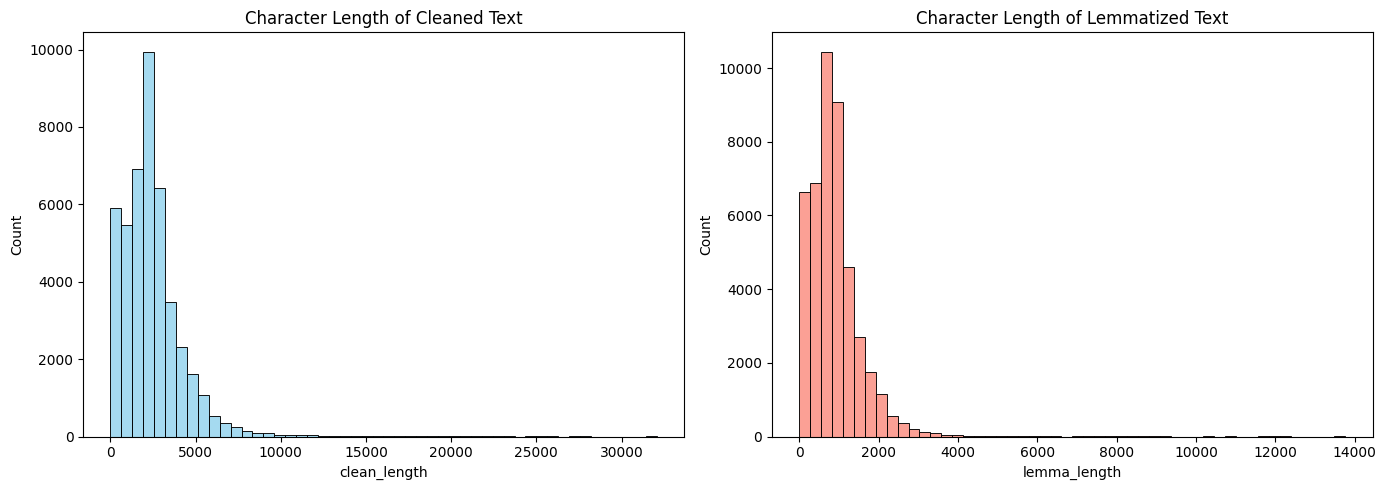

In [42]:
# Create a histogram plot to visualise character lengths
plt.figure(figsize=(14, 5))
# Add histogram for cleaned news text
plt.subplot(1, 2, 1)
sns.histplot(df_clean['clean_length'], bins=50, color='skyblue')
plt.title('Character Length of Cleaned Text')
# Add histogram for lemmatized news text with POS tags removed
plt.subplot(1, 2, 2)
sns.histplot(df_clean['lemma_length'], bins=50, color='salmon')
plt.title('Character Length of Lemmatized Text')

plt.tight_layout()
plt.show()

### **4.2** Find and display the top 40 words by frequency among true and fake news in Training data after processing the text  <font color = red>[10 marks]</font> <br>



##### 4.2.1 Find and display the top 40 words by frequency among true news in Training data after processing the text  <font color = red>[5 marks]</font> <br>

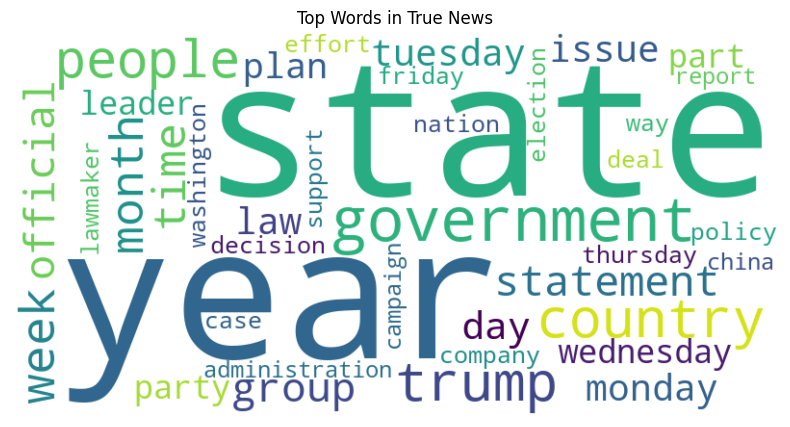

In [44]:
## Use a word cloud find the top 40 words by frequency among true news in the training data after processing the text
from wordcloud import WordCloud
# Filter news with label 1 (True News) and convert to it string and handle any non-string values
true_words = ' '.join(X_train[y_train == 1].dropna().tolist())
# Generate word cloud for True News
wordcloud_true = WordCloud(width=800, height=400, max_words=40, background_color='white').generate(true_words)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_true, interpolation='bilinear')
plt.axis('off')
plt.title('Top Words in True News')
plt.show()

##### 4.2.2 Find and display the top 40 words by frequency among fake news in Training data after processing the text  <font color = red>[5 marks]</font> <br>

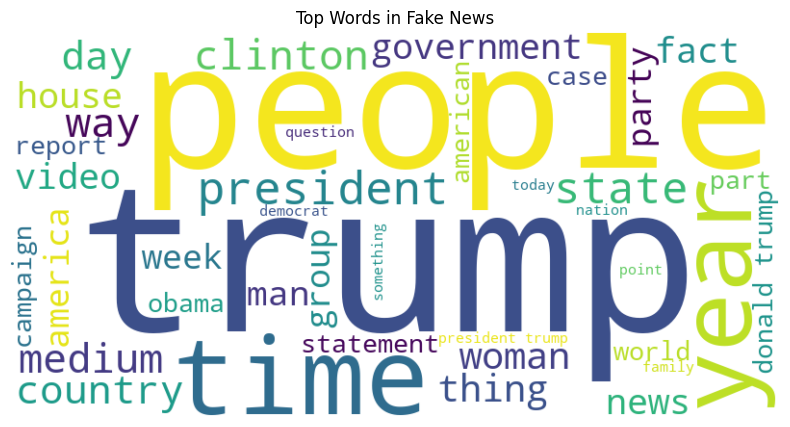

In [45]:
## Use a word cloud find the top 40 words by frequency among fake news in the training data after processing the text

# Filter news with label 0 (Fake News) and convert to it string and handle any non-string values
fake_words = ' '.join(X_train[y_train == 0].dropna().tolist())
# Generate word cloud for Fake News
wordcloud_fake = WordCloud(width=800, height=400, max_words=40, background_color='white').generate(fake_words)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_fake, interpolation='bilinear')
plt.axis('off')
plt.title('Top Words in Fake News')
plt.show()

### **4.3** Find and display the top unigrams, bigrams and trigrams by frequency in true news and fake news after processing the text  <font color = red>[20 marks]</font> <br>




##### 4.3.1 Write a function to get the specified top n-grams  <font color = red>[4 marks]</font> <br>



In [ ]:
# Write a function to get the specified top n-grams
from sklearn.feature_extraction.text import CountVectorizer

def get_top_ngrams(corpus, ngram_range=(1, 1), n=None):
    vec = CountVectorizer(ngram_range=ngram_range).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]

##### 4.3.2 Handle the NaN values  <font color = red>[1 mark]</font> <br>



In [47]:
# Handle NaN values in the text data
X_train.fillna("", inplace=True)
X_val.fillna("", inplace=True)

### For True News




##### 4.3.3 Display the top 10 unigrams by frequency in true news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>

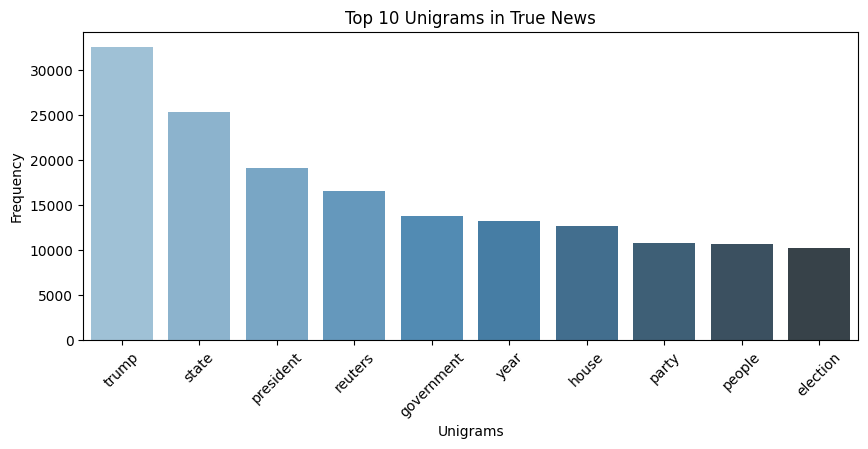

In [48]:
# Print the top 10 unigrams by frequency in true news and plot the same using a bar graph
true_unigrams = get_top_ngrams(X_train[y_train == 1], ngram_range=(1, 1), n=10)
words, freqs = zip(*true_unigrams)

plt.figure(figsize=(10, 4))
sns.barplot(x=list(words), y=list(freqs), palette='Blues_d')
plt.title('Top 10 Unigrams in True News')
plt.ylabel('Frequency')
plt.xlabel('Unigrams')
plt.xticks(rotation=45)
plt.show()

##### 4.3.4 Display the top 10 bigrams by frequency in true news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>



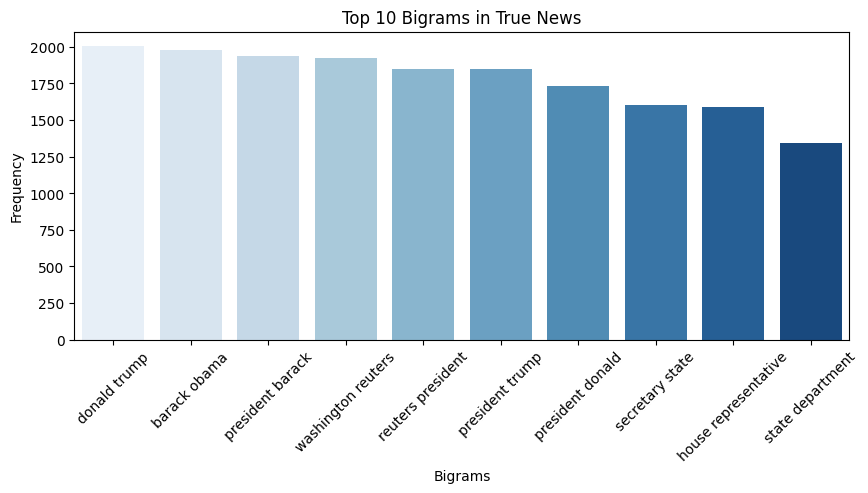

In [49]:
# Print the top 10 bigrams by frequency in true news and plot the same using a bar graph
true_bigrams = get_top_ngrams(X_train[y_train == 1], ngram_range=(2, 2), n=10)
words, freqs = zip(*true_bigrams)

plt.figure(figsize=(10, 4))
sns.barplot(x=list(words), y=list(freqs), palette='Blues')
plt.title('Top 10 Bigrams in True News')
plt.ylabel('Frequency')
plt.xlabel('Bigrams')
plt.xticks(rotation=45)
plt.show()

##### 4.3.5 Display the top 10 trigrams by frequency in true news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>



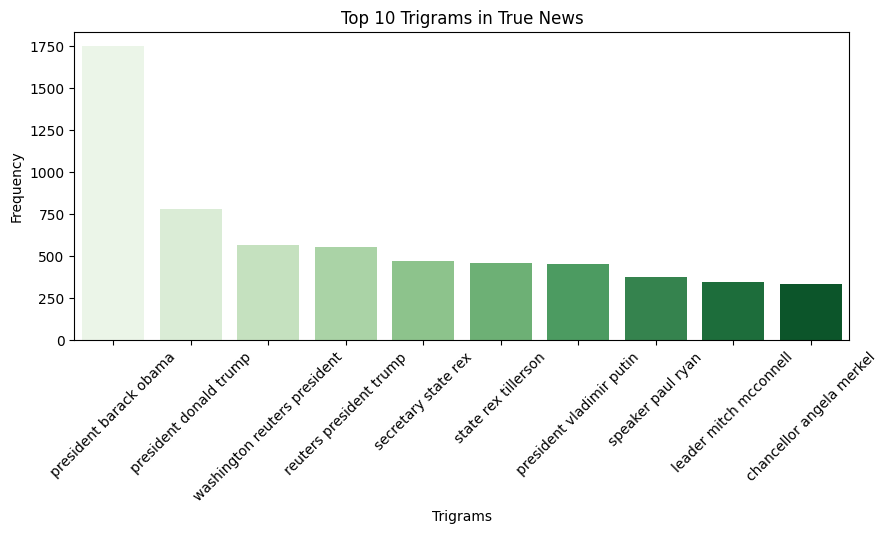

In [50]:
# Print the top 10 trigrams by frequency in true news and plot the same using a bar graph
true_trigrams = get_top_ngrams(X_train[y_train == 1], ngram_range=(3, 3), n=10)
words, freqs = zip(*true_trigrams)

plt.figure(figsize=(10, 4))
sns.barplot(x=list(words), y=list(freqs), palette='Greens')
plt.title('Top 10 Trigrams in True News')
plt.ylabel('Frequency')
plt.xlabel('Trigrams')
plt.xticks(rotation=45)
plt.show()

### For Fake News







##### 4.3.6 Display the top 10 unigrams by frequency in fake news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>

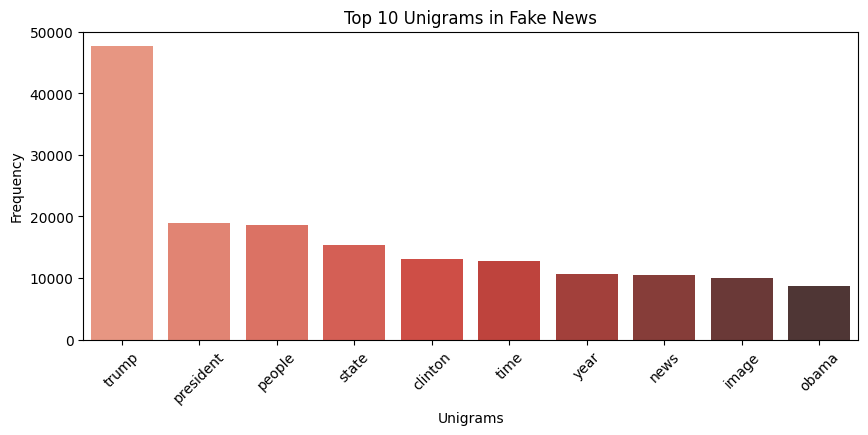

In [51]:
# Print the top 10 unigrams by frequency in fake news and plot the same using a bar graph
fake_unigrams = get_top_ngrams(X_train[y_train == 0], ngram_range=(1, 1), n=10)
words, freqs = zip(*fake_unigrams)

plt.figure(figsize=(10, 4))
sns.barplot(x=list(words), y=list(freqs), palette='Reds_d')
plt.title('Top 10 Unigrams in Fake News')
plt.ylabel('Frequency')
plt.xlabel('Unigrams')
plt.xticks(rotation=45)
plt.show()

##### 4.3.7 Display the top 10 bigrams by frequency in fake news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>



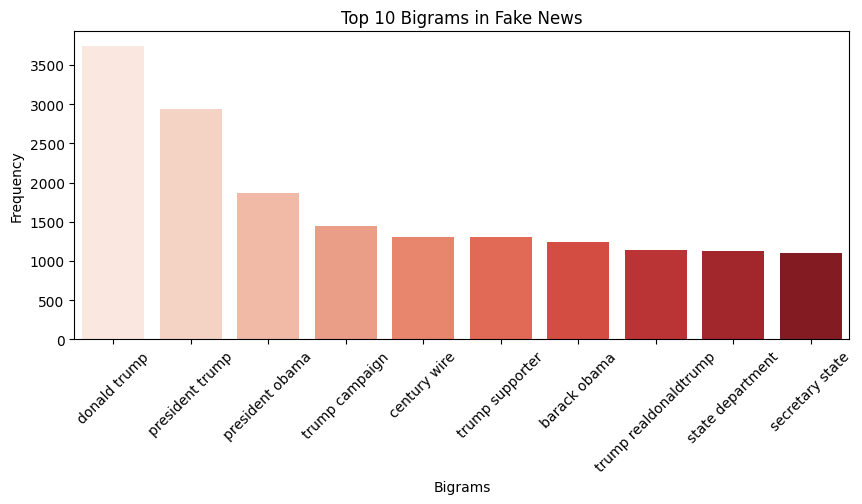

In [52]:
# Print the top 10 bigrams by frequency in fake news and plot the same using a bar graph
fake_bigrams = get_top_ngrams(X_train[y_train == 0], ngram_range=(2, 2), n=10)
words, freqs = zip(*fake_bigrams)

plt.figure(figsize=(10, 4))
sns.barplot(x=list(words), y=list(freqs), palette='Reds')
plt.title('Top 10 Bigrams in Fake News')
plt.ylabel('Frequency')
plt.xlabel('Bigrams')
plt.xticks(rotation=45)
plt.show()

##### 4.3.8 Display the top 10 trigrams by frequency in fake news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>



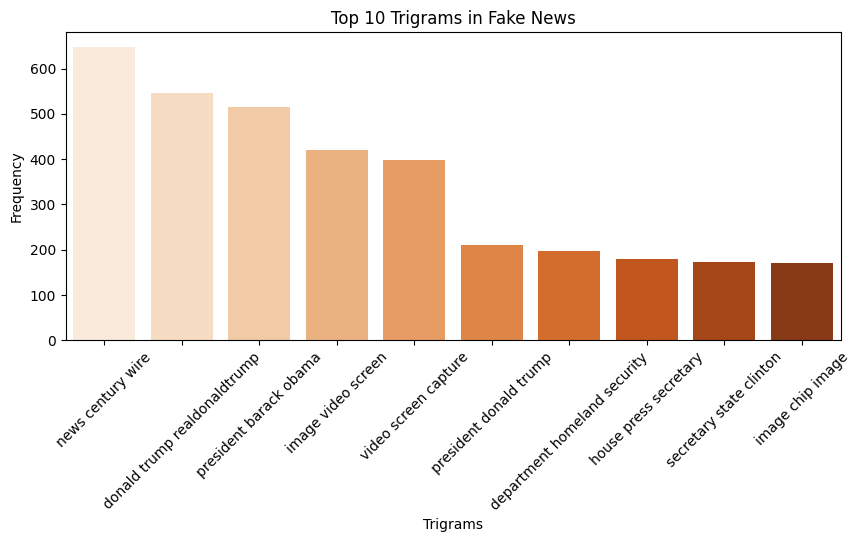

In [53]:
# Print the top 10 trigrams by frequency in fake news and plot the same using a bar graph
fake_trigrams = get_top_ngrams(X_train[y_train == 0], ngram_range=(3, 3), n=10)
words, freqs = zip(*fake_trigrams)

plt.figure(figsize=(10, 4))
sns.barplot(x=list(words), y=list(freqs), palette='Oranges')
plt.title('Top 10 Trigrams in Fake News')
plt.ylabel('Frequency')
plt.xlabel('Trigrams')
plt.xticks(rotation=45)
plt.show()


## **5.** Exploratory Data Analysis on Validation Data [Optional]

Perform EDA on validation data to differentiate EDA on training data with EDA on validation data and the tasks are given below:

<ul>
  <li> Visualise the data according to the character length of cleaned news text and lemmatized text with POS tags removed
  <li> Using a word cloud find the top 40 words by frequency in true and fake news separately
  <li> Find the top unigrams, bigrams and trigrams by frequency in true and fake news separately
</ul>





### **5.1** Visualise character lengths of cleaned news text and lemmatized news text with POS tags removed

##### 5.1.1  Add new columns to calculate the character lengths of the processed data columns

In [ ]:
# Add a new column to calculate the character length of cleaned news text

# Add a new column to calculate the character length of lemmatized news text with POS tags removed


##### 5.1.2  Create Histogram to visualise character lengths

Plot both distributions on the same graph for comparison and to observe overlaps and peak differences to understand text preprocessing's impact on text length.

In [ ]:
# Create a histogram plot to visualise character lengths

# Add histogram for cleaned news text

# Add histogram for lemmatized news text with POS tags removed


### **5.2** Find and display the top 40 words by frequency among true and fake news after processing the text

##### 5.2.1  Find and display the top 40 words by frequency among true news in validation data after processing the text

In [ ]:
## Use a word cloud find the top 40 words by frequency among true news after processing the text

# Generate word cloud for True News


##### 5.2.2  Find and display the top 40 words by frequency among fake news in validation data after processing the text

In [ ]:
## Use a word cloud find the top 40 words by frequency among fake news after processing the text

# Generate word cloud for Fake News


### **5.3** Find and display the top unigrams, bigrams and trigrams by frequency in true news and fake news after processing the text  





##### 5.3.1 Write a function to get the specified top n-grams

In [ ]:
## Write a function to get the specified top n-grams


##### 5.3.2 Handle the NaN values

In [ ]:
## First handle NaN values in the text data


### For True News



##### 5.3.3 Display the top 10 unigrams by frequency in true news and plot them as a bar graph

In [ ]:
## Print the top 10 unigrams by frequency in true news and plot the same using a bar graph


##### 5.3.4 Display the top 10 bigrams by frequency in true news and plot them as a bar graph

In [ ]:
## Print the top 10 bigrams by frequency in true news and plot the same using a bar graph


##### 5.3.5 Display the top 10 trigrams by frequency in true news and plot them as a bar graph

In [ ]:
## Print the top 10 trigrams by frequency in true news and plot the same using a bar graph


### For Fake News

##### 5.3.6 Display the top 10 unigrams by frequency in fake news and plot them as a bar graph

In [ ]:
## Print the top 10 unigrams by frequency in fake news and plot the same using a bar graph


##### 5.3.7 Display the top 10 bigrams by frequency in fake news and plot them as a bar graph

In [ ]:
## Print the top 10 bigrams by frequency in fake news and plot the same using a bar graph


##### 5.3.8 Display the top 10 trigrams by frequency in fake news and plot them as a bar graph

In [ ]:
## Print the top 10 trigrams by frequency in fake news and plot the same using a bar graph


## **6.** Feature Extraction  <font color = red>[10 marks]</font> <br>

For any ML model to perform classification on textual data, you need to convert it to a vector form. In this assignment, you will use the Word2Vec Vectorizer to create vectors from textual data. Word2Vec model captures the semantic relationship between words.


### **6.1** Initialise Word2Vec model  <font color = red>[2 marks]</font>

In [55]:
pip install gensim

   ---------------------------------------- 0.0/24.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/24.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/24.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/24.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/24.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/24.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/24.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/24.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/24.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/24.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/24.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/24.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/24.0 MB 41.0 kB/s eta 0:09:46
   ---------------------------------------- 0.0/24.0 MB 41.0 kB/s eta 0:09:46
   -


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [57]:
## Write your code here to initialise the Word2Vec model by downloading "word2vec-google-news-300"
from gensim.models import KeyedVectors

# Load Google's pre-trained Word2Vec model (only do this once and it’s ~1.5GB)
w2v_model = KeyedVectors.load_word2vec_format(
    'GoogleNews-vectors-negative300.bin', binary=True
)

### **6.2** Extract vectors for cleaned news data   <font color = red>[8 marks]</font>

In [58]:
## Write your code here to extract the vectors from the Word2Vec model for both training and validation data
from gensim.utils import simple_preprocess
import numpy as np
## Extract the target variable for the training data and validation data
# Tokenize the text
X_train_tokens = X_train.progress_apply(simple_preprocess)
X_val_tokens = X_val.progress_apply(simple_preprocess)

# Convert to Word2Vec average vectors
def get_avg_vector(tokens, model, dim=300):
    valid_tokens = [token for token in tokens if token in model]
    if not valid_tokens:
        return np.zeros(dim)
    return np.mean(model[valid_tokens], axis=0)

X_train_vec = np.vstack(X_train_tokens.progress_apply(lambda x: get_avg_vector(x, w2v_model)))
X_val_vec = np.vstack(X_val_tokens.progress_apply(lambda x: get_avg_vector(x, w2v_model)))


100%|██████████| 13476/13476 [00:01<00:00, 6774.43it/s]


## **7.** Model Training and Evaluation <font color = red>[45 marks]</font>

You will use a set of supervised models to classify the news into true or fake.

### **7.0** Import models and evaluation metrics

In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report

### **7.1** Build Logistic Regression Model  <font color = red>[15 marks]</font>

##### 7.1.1 Create and train logistic regression model on training data  <font color = red>[10 marks]</font>

In [62]:
from sklearn.linear_model import LogisticRegression
## Initialise Logistic Regression model
lr_model = LogisticRegression()
## Train Logistic Regression model on training data
lr_model.fit(X_train_vec, y_train)
## Predict on validation data
lr_preds = lr_model.predict(X_val_vec)

##### 7.1.2 Calculate and print accuracy, precision, recall and f1-score on validation data <font color = red>[5 marks]</font>

In [63]:
## Calculate and print accuracy, precision, recall, f1-score on predicted labels
print("Logistic Regression Results:")
print("Accuracy:", accuracy_score(y_val, lr_preds))
print("Precision:", precision_score(y_val, lr_preds))
print("Recall:", recall_score(y_val, lr_preds))
print("F1 Score:", f1_score(y_val, lr_preds))

Logistic Regression Results:
Accuracy: 0.9300237459186702
Precision: 0.9261930336044192
Recall: 0.9289012003693444
F1 Score: 0.9275451402228199


In [64]:
# Classification Report
print("Classification Report for Logistic Regression:")
print(classification_report(y_val, lr_preds))

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      6978
           1       0.93      0.93      0.93      6498

    accuracy                           0.93     13476
   macro avg       0.93      0.93      0.93     13476
weighted avg       0.93      0.93      0.93     13476



### **7.2** Build Decision Tree Model <font color = red>[15 marks]</font>

##### 7.2.1 Create and train a decision tree model on training data <font color = red>[10 marks]</font>

In [65]:
from sklearn.tree import DecisionTreeClassifier
## Initialise Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
## Train Decision Tree model on training data
dt_model.fit(X_train_vec, y_train)
## Predict on validation data
dt_preds = dt_model.predict(X_val_vec)

##### 7.2.2 Calculate and print accuracy, precision, recall and f1-score on validation data <font color = red>[5 marks]</font>

In [66]:
## Calculate and print accuracy, precision, recall, f1-score on predicted labels
print("Decision Tree Results:")
print("Accuracy:", accuracy_score(y_val, dt_preds))
print("Precision:", precision_score(y_val, dt_preds))
print("Recall:", recall_score(y_val, dt_preds))
print("F1 Score:", f1_score(y_val, dt_preds))

Decision Tree Results:
Accuracy: 0.850549124369249
Precision: 0.8640792465086067
Recall: 0.8188673437980917
F1 Score: 0.840865992414665


In [67]:
# Classification Report
print("Classification Report for Decision Tree:")
print(classification_report(y_val, dt_preds))

Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.84      0.88      0.86      6978
           1       0.86      0.82      0.84      6498

    accuracy                           0.85     13476
   macro avg       0.85      0.85      0.85     13476
weighted avg       0.85      0.85      0.85     13476



### **7.3** Build Random Forest Model <font color = red>[15 marks]</font>


##### 7.3.1 Create and train a random forest model on training data <font color = red>[10 marks]</font>

In [68]:
from sklearn.ensemble import RandomForestClassifier
## Initialise Random Forest model
rf_model = RandomForestClassifier(random_state=42)
## Train Random Forest model on training data
rf_model.fit(X_train_vec, y_train)
## Predict on validation data
rf_preds = rf_model.predict(X_val_vec)

 ##### 7.3.2 Calculate and print accuracy, precision, recall and f1-score on validation data <font color = red>[5 marks]</font>

In [69]:
## Calculate and print accuracy, precision, recall, f1-score on predicted labels
print("Random Forest Results:")
print("Accuracy:", accuracy_score(y_val, rf_preds))
print("Precision:", precision_score(y_val, rf_preds))
print("Recall:", recall_score(y_val, rf_preds))
print("F1 Score:", f1_score(y_val, rf_preds))

Random Forest Results:
Accuracy: 0.9249035322054022
Precision: 0.9359504132231405
Recall: 0.9062788550323176
F1 Score: 0.9208756841282252


In [70]:
# Classification Report
print("Classification Report for Random Forest:")
print(classification_report(y_val, rf_preds))

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.92      0.94      0.93      6978
           1       0.94      0.91      0.92      6498

    accuracy                           0.92     13476
   macro avg       0.93      0.92      0.92     13476
weighted avg       0.93      0.92      0.92     13476



## **8.** Conclusion <font color = red>[5 marks]</font>

Summarise your findings by discussing patterns observed in true and fake news and how semantic classification addressed the problem. Highlight the best model chosen, the evaluation metric prioritised for the decision, and assess the approach and its impact.

In [71]:
results = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest'],
    'Accuracy': [
        accuracy_score(y_val, lr_preds),
        accuracy_score(y_val, dt_preds),
        accuracy_score(y_val, rf_preds)
    ],
    'Precision': [
        precision_score(y_val, lr_preds),
        precision_score(y_val, dt_preds),
        precision_score(y_val, rf_preds)
    ],
    'Recall': [
        recall_score(y_val, lr_preds),
        recall_score(y_val, dt_preds),
        recall_score(y_val, rf_preds)
    ],
    'F1 Score': [
        f1_score(y_val, lr_preds),
        f1_score(y_val, dt_preds),
        f1_score(y_val, rf_preds)
    ]
})

print(results)

                 Model  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression  0.930024   0.926193  0.928901  0.927545
1        Decision Tree  0.850549   0.864079  0.818867  0.840866
2        Random Forest  0.924904   0.935950  0.906279  0.920876


In this project, we examined textual characteristics of both true and fake news to uncover semantic patterns useful for classification. Our preprocessing pipeline involved cleaning, lemmatising, and retaining only meaningful nouns, which helped isolate the core concepts present in the articles. We observed that true news articles often focused on formal, factual entities and institutions, while fake news exhibited a tendency toward sensationalism and repetitive use of emotionally charged terms.

By employing Word2Vec embeddings to capture the semantic meaning of the text, we trained three models: Logistic Regression, Decision Tree, and Random Forest. Among these, Logistic Regression performed best with an accuracy of 93.0% and balanced scores across precision (92.6%), recall (92.9%), and F1 score (92.8%). This model was chosen as the final solution.

We prioritised the F1 Score for model selection, as it balances both precision and recall — a crucial consideration in fake news detection where both false positives and false negatives carry significant implications. For instance, misclassifying fake news as true could lead to the spread of misinformation, while misclassifying true news as fake could erode public trust in reliable sources.

Overall, our semantic classification approach proved effective in differentiating between fake and true news by focusing on meaningful lexical features. The pipeline, though straightforward, demonstrates the power of thoughtful text preprocessing and semantic representation in addressing real-world misinformation challenges.

